# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# 2. Load Data

- 총 4277개의 train data
- 총 15개의 class (transistor, capsule, wood, bottle, screw, cable, carpet, hazelnut, pill, metal_nut, zipper, leather, toothbrush, tile, grid)

In [2]:
train_y = pd.read_csv("../data/train_df.csv")
train_y

,index,file_name,class,state,label
0,0,10000.png,transistor,good,transistor-good
1,1,10001.png,capsule,good,capsule-good
2,2,10002.png,transistor,good,transistor-good
3,3,10003.png,wood,good,wood-good
4,4,10004.png,bottle,good,bottle-good
...,...,...,...,...,...
4272,4272,14272.png,transistor,good,transistor-good
4273,4273,14273.png,transistor,good,transistor-good
4274,4274,14274.png,grid,good,grid-good
4275,4275,14275.png,zipper,good,zipper-good


In [3]:
classList = train_y['class'].unique()
classList

array(['transistor', 'capsule', 'wood', 'bottle', 'screw', 'cable',
       'carpet', 'hazelnut', 'pill', 'metal_nut', 'zipper', 'leather',
       'toothbrush', 'tile', 'grid'], dtype=object)

In [4]:
print('class 개수:', len(classList))

class 개수: 15


In [5]:
labelList = train_y['label'].unique()
print('label 개수:', len(labelList))

label 개수: 88


# 3. Preprocessing

- label별로 숫자를 계산하여 데이터프레임 생성
- class별로 데이터프레임을 생성하여 dictionary에 저장 (총 15개의 데이터프레임)

In [6]:
labelCount = train_y[['class', 'label']].groupby('label').count().rename(columns={'class': 'count'})
labelCount

,count
label,
bottle-broken_large,10
bottle-broken_small,11
bottle-contamination,11
bottle-good,209
cable-bent_wire,7
...,...
zipper-fabric_interior,8
zipper-good,240
zipper-rough,9


In [7]:
anomaly_dict = {}
for className in classList:
    df = pd.DataFrame(labelCount[labelCount.index.str.contains(className)]).sort_values(by='count', ascending=False)
    anomaly_dict[className] = df

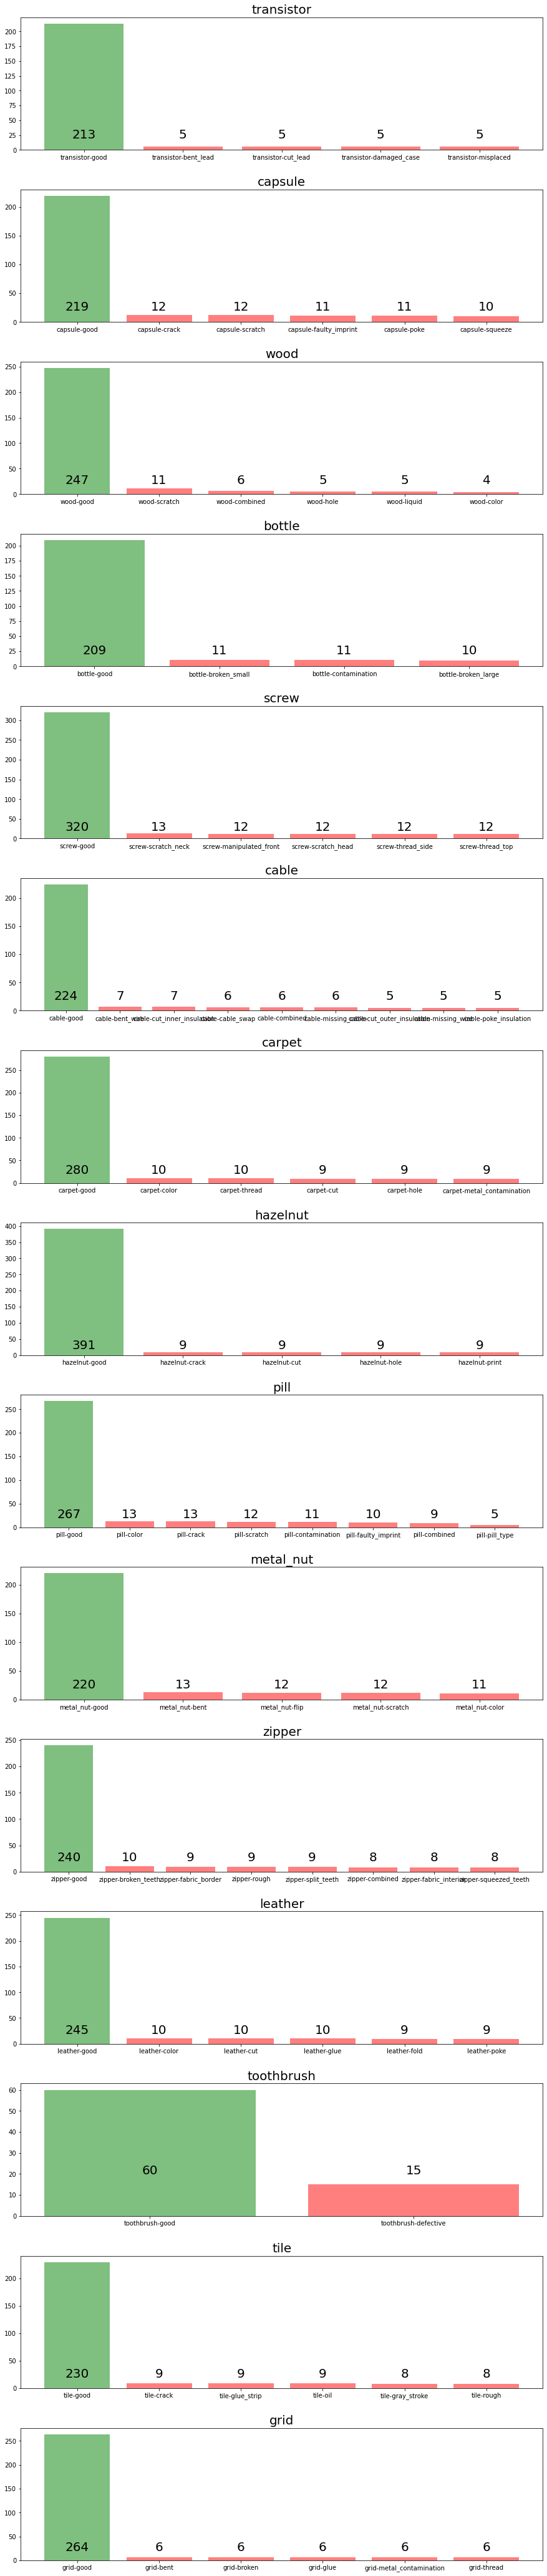

In [8]:
fig, axs = plt.subplots(15, 1, figsize=(15, 15*5))
fig.subplots_adjust(hspace = .3)
axs = axs.ravel()

for i, (className, df) in enumerate(anomaly_dict.items()):
    colors = ['red' for i in range(len(df.index))]
    colors[0] = 'green'
    axs[i].bar(df.index, df.iloc[:, 0], color=colors, alpha=0.5)
    axs[i].set_title(className, fontsize=20)
    for j, value in enumerate(df.iloc[:, 0]):
        axs[i].text(j, 20, df.iloc[:, 0][j], ha='center', fontsize=20)